# KerasによるDeep Neural Network実装(MNIST)
PythonのDeep Learningライブラリ Kerasを用いてDeep Neural Networkの実装をします．

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

from matplotlib import rcParams
rcParams["figure.figsize"] = [15, 5]
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['axes.labelsize'] = 15
rcParams['axes.titlesize'] = 18
rcParams['legend.fontsize'] = 15

%matplotlib inline

Using TensorFlow backend.


## 1. データの準備

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 28x28 の行列を 784x1 のベクトルに変換してください 

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (60000, 784)
y_train: (60000, 10)
x_test: (10000, 784)
y_test: (10000, 10)


## 2. モデル構築

- SequentialモデルでDNNを構築します．`model = Sequential()`でSequentialモデルを宣言します．
- 一つのレイヤーは`Dense`レイヤーを追加することで実装できます．`Dense`では，ユニット数と活性化を指定できます．
- 一番初めの層だけは`input_shape`引数が必要です．入力の次元を指定します．

### 精度向上のヒント
1. 活性化関数を変えてみましょう．Kerasでは次の活性化が利用できます: https://keras.io/ja/activations/
1. Dropout層を追加してみましょう．Dropoutは一般的には活性化の前に挿入されることが多いです．その場合，
```
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(Activation('sigmoid'))
```
のようにすることで実装できます．
1. 層を増減してみましょう．一般に，多層であるほどニューラルネットの表現力は向上します．一方で，表現力が高まると過学習を引き起こしやすくなります．
1. 中間層を絞ってみましょう．つまり，中間層のユニット数を減らしてみましょう．ユニット数が少ないとニューラルネットの表現力は下がりますが，一方でより本質的な情報をニューラルネットが学習するようになります．
1. 損失関数を変えてみましょう．
1. 最適化手法を変えてみましょう．また，学習率を変えてみましょう．学習率は次のように指定できます．
```
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001))
```
1. 精度がエポックごとに安定しない場合は，バッチサイズを小さくしてみましょう．バッチサイズが小さいほどパラメータ更新が高頻度で行われるため，勾配が安定します．
1. エポック数を大きくしてみましょう．一見精度の向上の見込みがなくても，局所最適にはまっているだけの場合があります．その場合は，学習を続けることで局所最適を脱して精度がまた上がり始めることがあります．

In [7]:
# モデルの構築
model = Sequential()


'''

自由にモデル構築をして評価してみましょう

'''

model.add(Dense(128, input_shape=(28*28,), activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(10, activation="softmax"))

- `model.summary()`関数で，構築したモデルの概要が確認できます．

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                250       
Total params: 103,826
Trainable params: 103,826
Non-trainable params: 0
_________________________________________________________________


- 構築したモデルをコンパイルします．コンパイルには，損失関数，最適化手法と評価関数が設定できます．
- 損失関数は次のものが使用できます: https://keras.io/ja/losses/
- 最適化手法は次のものが使用できます: https://keras.io/ja/optimizers/
- 評価関数は，未指定の場合はlossが採用されます．その他いくつか使用可能なものがありますが，一般にはaccuracyを用いると良いでしょう．

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

- バッチサイズ，エポック数を指定し，`model.fit`関数で学習を開始できます．
- `model.fit`をもう一度実行すると，前回の学習状態からスタートします．リセットしたい場合は，`model.reset_states()`を再実行してから`model.fit`を実行します．

In [10]:
# バッチサイズ
batch_size = 1000

# エポック数
epochs = 10

In [11]:
# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.8883 - acc: 0.7550 - val_loss: 0.3404 - val_acc: 0.9052
Epoch 2/10
60000/60000 [==============================] - 0s - loss: 0.2942 - acc: 0.9165 - val_loss: 0.2397 - val_acc: 0.9329
Epoch 3/10
60000/60000 [==============================] - 0s - loss: 0.2231 - acc: 0.9362 - val_loss: 0.1989 - val_acc: 0.9446
Epoch 4/10
60000/60000 [==============================] - 0s - loss: 0.1848 - acc: 0.9478 - val_loss: 0.1729 - val_acc: 0.9499
Epoch 5/10
60000/60000 [==============================] - 0s - loss: 0.1587 - acc: 0.9550 - val_loss: 0.1563 - val_acc: 0.9546
Epoch 6/10
60000/60000 [==============================] - 0s - loss: 0.1391 - acc: 0.9607 - val_loss: 0.1454 - val_acc: 0.9582
Epoch 7/10
60000/60000 [==============================] - 0s - loss: 0.1241 - acc: 0.9648 - val_loss: 0.1333 - val_acc: 0.9614
Epoch 8/10
60000/60000 [==============================] - 0s 

- `model.evaluate`関数によって現在のモデルの精度が確認できます．

In [12]:
# テストスコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 9216/10000 [==========================>...] - ETA: 0sTest loss: 0.11395659392
Test accuracy: 0.9663


## 3. モデルの評価

## 3-1. 学習過程の可視化

- エポックごとのLossとAccuracyを可視化します．
- 過学習やUnder Fittingの確認をすることができます．

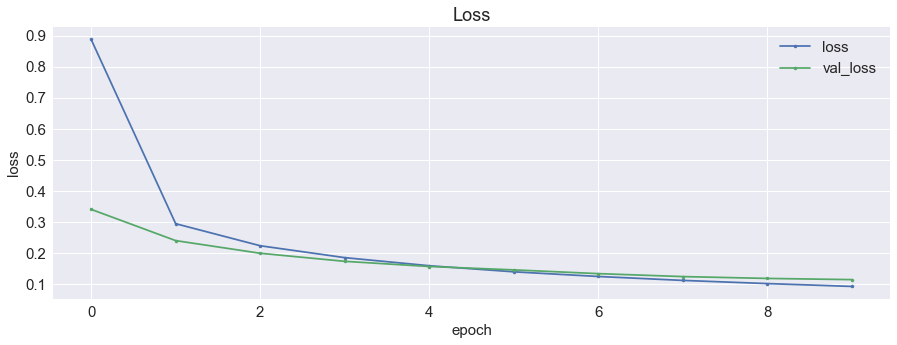

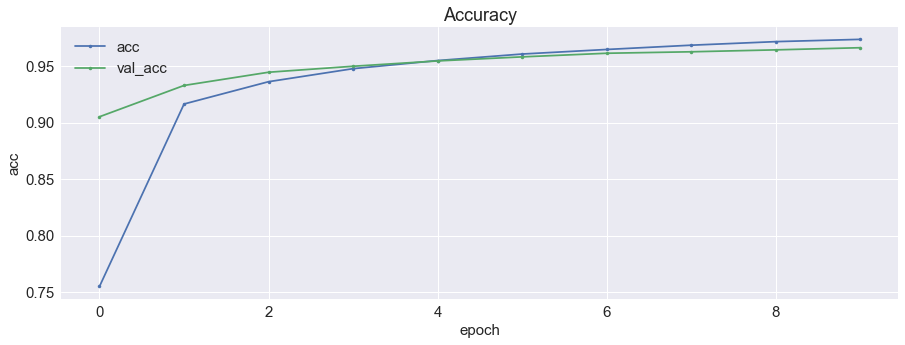

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(15,5))
plt.rcParams["font.size"] = "20"
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.figure(figsize=(15,5))
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

## 3-2. Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

y_pred = model.predict_classes(x_test, batch_size=32, verbose=2)
y_gt = np.apply_along_axis(np.argmax,1,y_test)

conf_matrix = confusion_matrix(y_gt,y_pred)

- 今回は，クラス分類結果数のマトリックスと，正解クラス別の予測分類結果の割合のマトリックスを表示してみます．

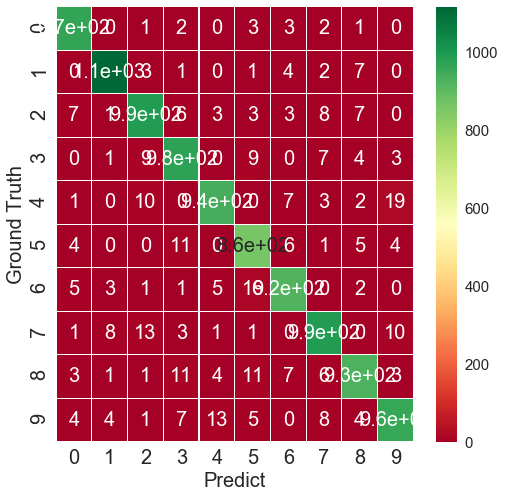

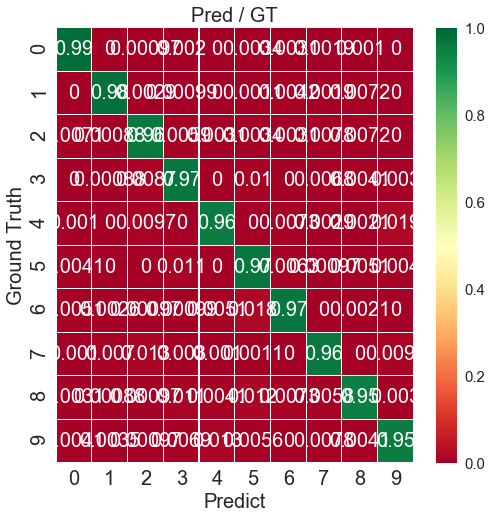

In [15]:
conf_cnt_df = pd.DataFrame(conf_matrix)
conf_rate_df = pd.DataFrame(conf_matrix/np.sum(conf_matrix, axis=1))

plt.figure(figsize = (8,8))
sns.heatmap(conf_cnt_df, annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)
plt.xlabel("Predict", fontsize=20); plt.xticks(fontsize=20)
plt.ylabel("Ground Truth", fontsize=20); plt.yticks(fontsize=20)
plt.show()

plt.figure(figsize = (8,8))
plt.title("Pred / GT", fontsize=20)
sns.heatmap(conf_rate_df, annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0, vmax=1.)
plt.xlabel("Predict", fontsize=20); plt.xticks(fontsize=20)
plt.ylabel("Ground Truth", fontsize=20); plt.yticks(fontsize=20)
plt.show()

## 3-3. Recall, Precision, F-Measure

In [16]:
col=["TP","FP","TN","FN","Precision","Recall","F"]

df_evaluation = pd.DataFrame(columns=col)

for i in range(conf_matrix.shape[0]):
    tp = conf_matrix[i][i]
    fp = np.sum(conf_matrix[:,i]) - tp
    fn = np.sum(conf_matrix[i]) - tp
    tn = np.sum(conf_matrix) - tp - fp - fn
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F = 2 * recall * precision / (recall + precision)
    df_evaluation = df_evaluation.append(pd.DataFrame([[tp,fp,tn,fn,precision,recall,F]],
                                                                      columns=col),
                                                                     ignore_index=True)

In [17]:
df_evaluation

,TP,FP,TN,FN,Precision,Recall,F
0,968,25,8995,12,0.974824,0.987755,0.981247
1,1117,18,8847,18,0.984141,0.984141,0.984141
2,994,39,8929,38,0.962246,0.963178,0.962712
3,977,42,8948,33,0.958783,0.967327,0.963036
4,940,26,8992,42,0.973085,0.957230,0.965092
5,861,49,9059,31,0.946154,0.965247,0.955605
6,925,30,9012,33,0.968586,0.965553,0.967067
7,991,37,8935,37,0.964008,0.964008,0.964008
8,927,32,8994,47,0.966632,0.951745,0.959131
9,963,39,8952,46,0.961078,0.954410,0.957732


- 評価値の統計量を計算します，

In [18]:
df_evaluation.describe()

,Precision,Recall,F
count,10.000000,10.000000,10.000000
mean,0.965954,0.966059,0.965977
std,0.010287,0.011696,0.009491
min,0.946154,0.951745,0.955605
25%,0.961370,0.958717,0.960026
50%,0.965320,0.964627,0.963522
75%,0.971960,0.966883,0.966574
max,0.984141,0.987755,0.984141


## 3-4. モデルの保存

- `model.save`で，現在のモデルを保存できます．

In [19]:
# model.save("nn_mnist.h5")

- 保存したモデルは以下のように呼び出せます．

In [20]:
# 保存したモデルを読み込む場合は実行
# model = keras.models.load_model('./mnist_data.h5')

# 4.モデルの利用

- 学習したモデルを使って，自由な画像を分類させます．
- 画像ファイルの読み込みは`PIL`ライブラリを用います．

In [21]:
from PIL import Image

#画像の読み込み
im = Image.open("./handwritten_3.jpg")

- 今回はグレースケール画像の学習を行ったため，入力画像もグレースケール変換します．`convert('L')`を用います．
- 学習には28x28画像を用いたので，入力画像も同じ解像度に変換します．`resize(28,28)`を用います．
- 画像データをnumpy配列に変換します．

In [22]:
# 画像を白黒に変換
gray_img = im.convert('L')

# 画像の解像度を変換
gray_img = gray_img.resize((28,28))

#画像をarrayに変換
im_list = np.array(gray_img, 'f')

- 学習には，黒地に白文字の画像を用いたので，入力画像によって白黒反転を行います．

In [23]:
##白地に黒文字の場合は実行
##白黒反転をし，正規化
im_list = 1 - im_list/255.

##黒地に白文字の場合はそのまま正規化
##正規化
#im_list = im_list/255.

- 画像の表示には`plt.imshow`を用います．

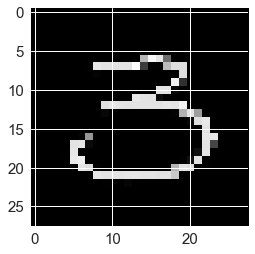

In [24]:
#入力画像の表示
plt.imshow(im_list,cmap=plt.get_cmap('gray'))

- 分類を行います．`model.predict`関数で，各クラスの分類確率を計算できます．
- 最後に，最も確率の高いクラスを分類結果として採用します．

In [25]:
test = im_list.reshape(1,784)
pred = model.predict(test)

print(pred)
print('\n')
print('Result:',np.argmax(pred[0]))

[[  2.20642216e-03   5.98663092e-03   1.61169171e-02   9.06975389e-01
    1.85973011e-03   5.83305545e-02   7.73740059e-04   1.68828876e-03
    5.76492632e-03   2.97365885e-04]]


Result: 3
